In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pred_table = pd.read_csv("2022_2023_table.csv")

In [3]:
last_table = pd.read_csv("league_table.csv")

In [4]:
del pred_table["Unnamed: 0"]

In [5]:
del last_table["Unnamed: 0"]

In [6]:
teams = pred_table["Squad"]

In [7]:
data = pred_table["Pts"]
data2 = last_table["Pts"]

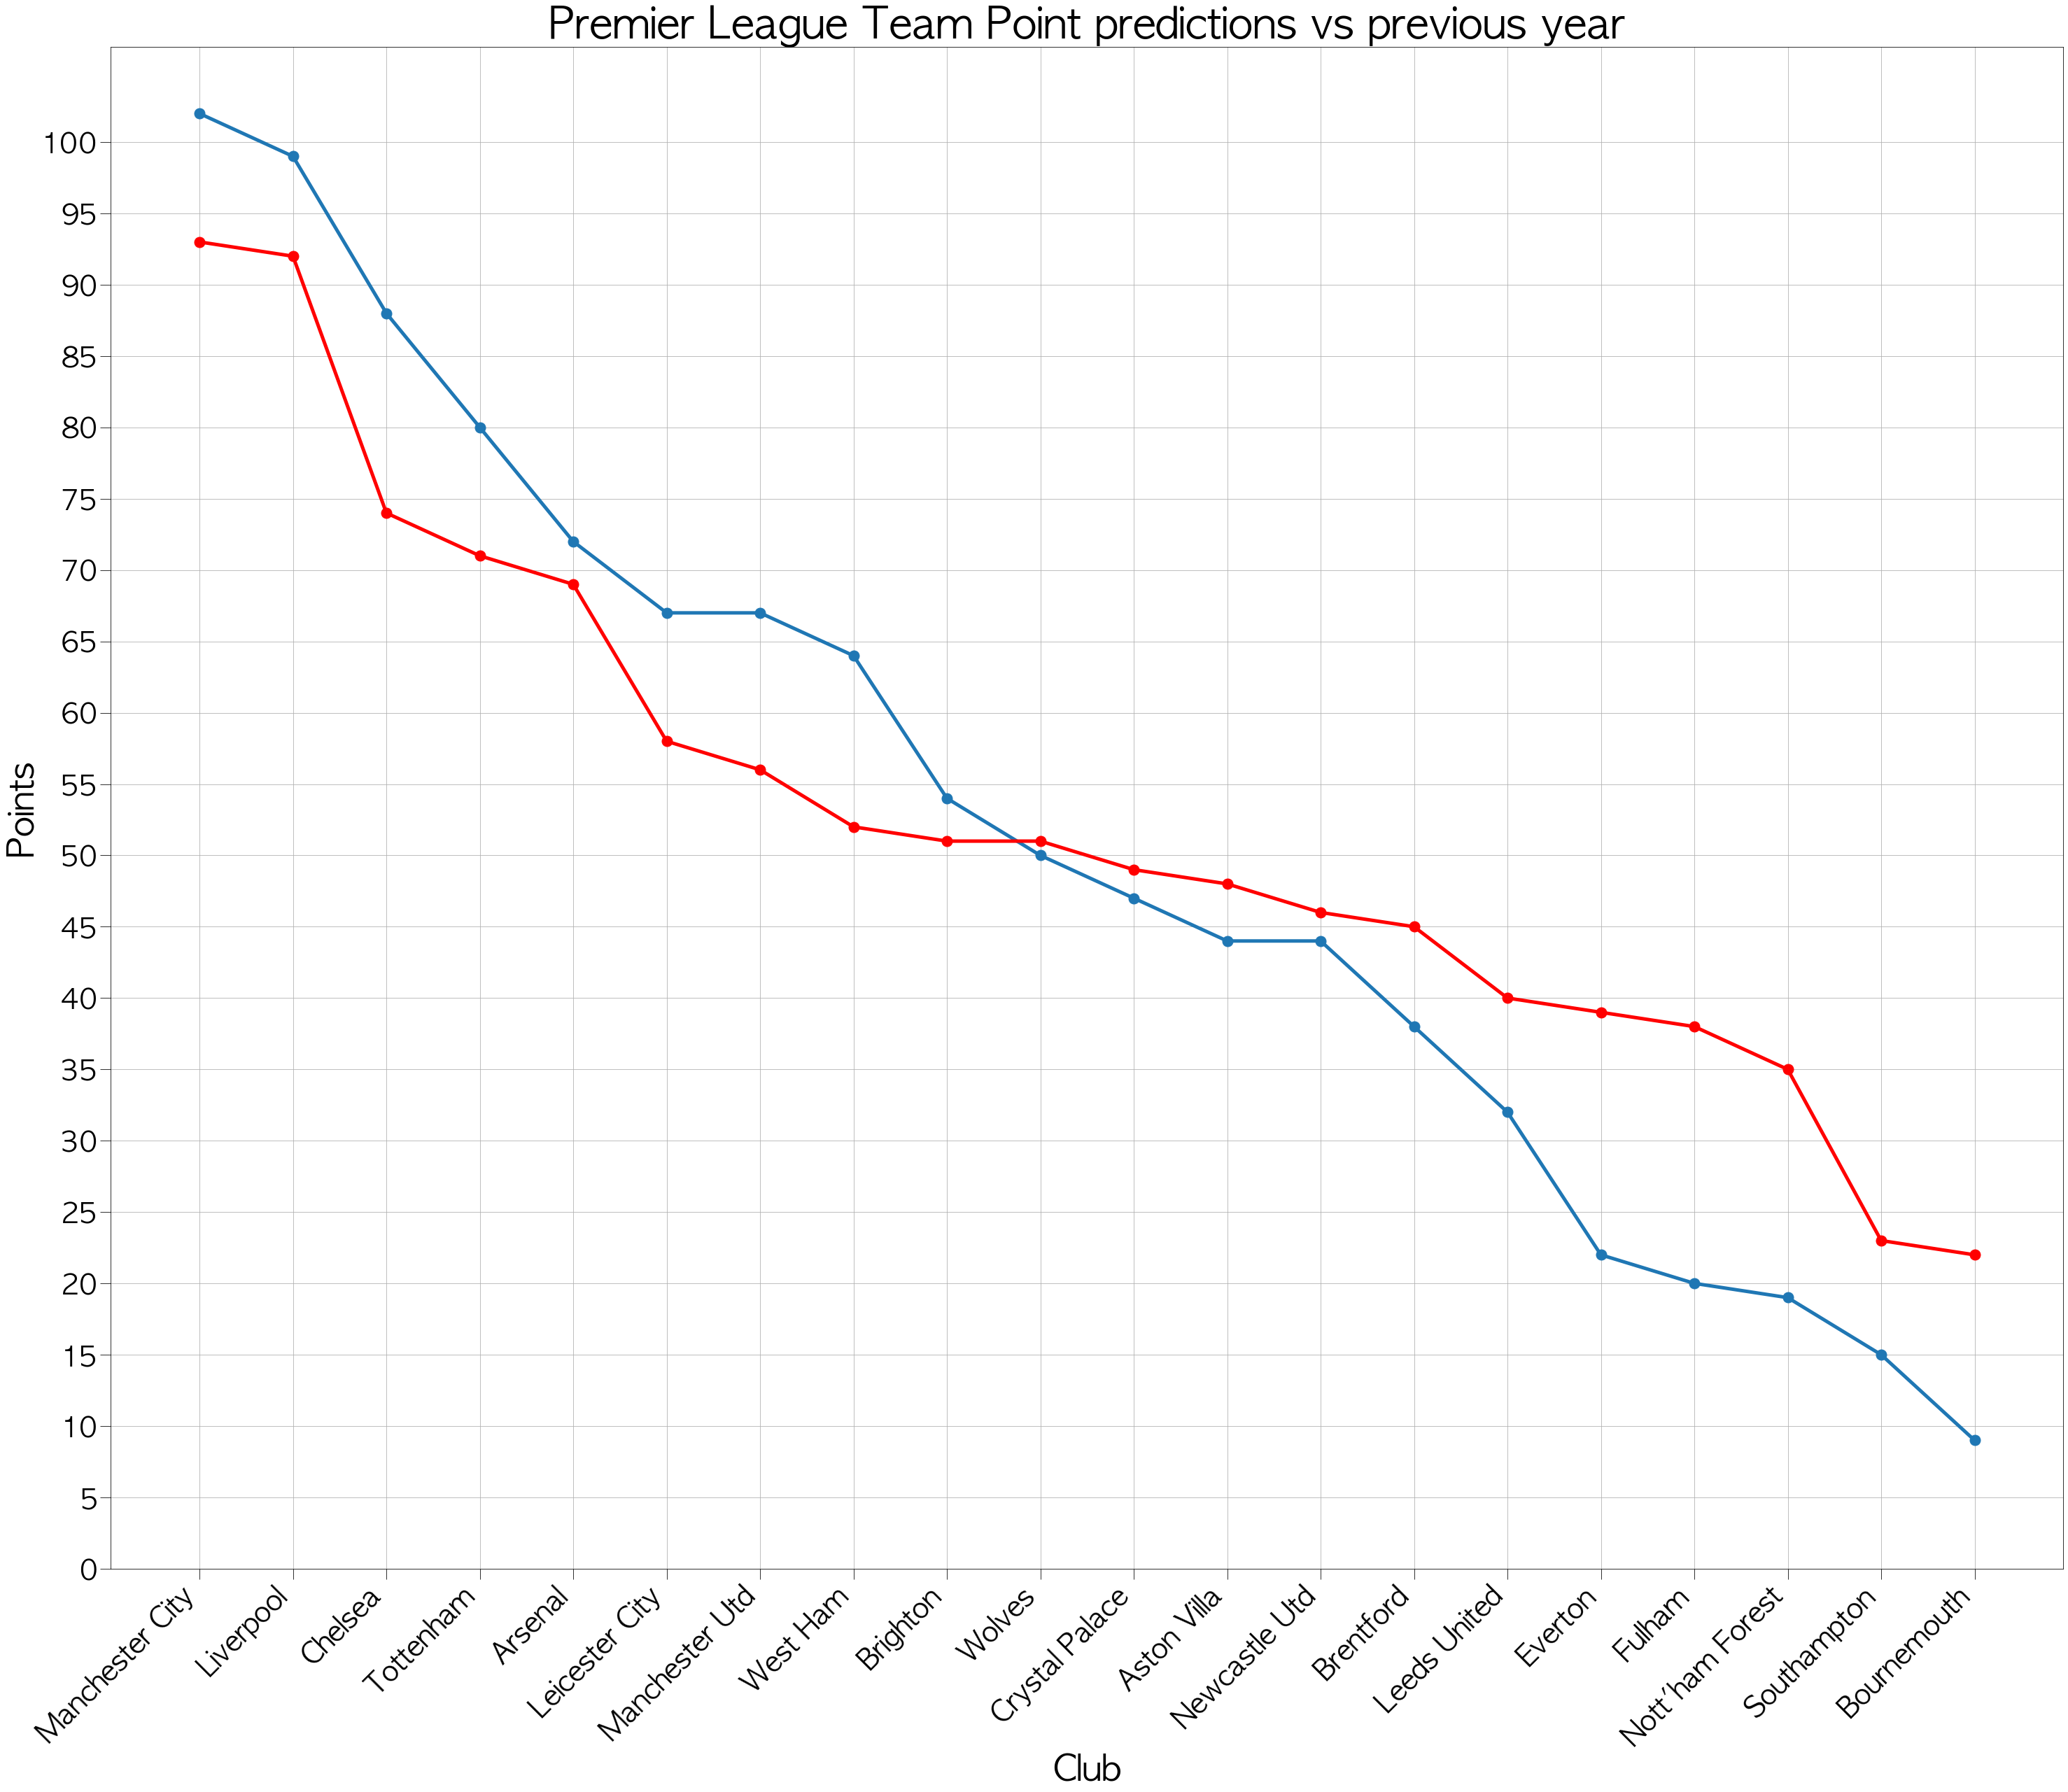

<Figure size 432x288 with 0 Axes>

In [8]:
hfont = {'fontname':'AppleGothic'}
plt.figure(figsize=(50, 40))
y_pos = np.arange(len(teams))
x_pos = np.arange(0, 105, 5)
plt.plot(y_pos, data, marker='o', markersize=15, linestyle='-', linewidth=5)
plt.plot(y_pos, data2, marker='o', markersize=15, color='r', linestyle='-', linewidth=5)
plt.xticks(y_pos, teams, fontsize=40, rotation = 45, ha = 'right', **hfont)
plt.yticks(x_pos, fontsize=40, **hfont)

plt.title('Premier League Team Point predictions vs previous year', fontsize=60, **hfont)
plt.tick_params(axis='x', length=15)
plt.tick_params(axis='y', length=15)
plt.xlabel('Club', fontsize=50, **hfont)
plt.ylabel('Points', fontsize=50, **hfont)
plt.grid()
plt.savefig("pred_vs_previous.jpg", transparent = False)
plt.show()
plt.clf()

In [9]:
from bs4 import BeautifulSoup
import requests
import os
import shutil

In [10]:
url_2020 = "https://fbref.com/en/comps/9/10728/2020-2021-Premier-League-Stats"
url_2019 = "https://fbref.com/en/comps/9/3232/2019-2020-Premier-League-Stats"
url_2018 = "https://fbref.com/en/comps/9/1889/2018-2019-Premier-League-Stats"
url_2017 = "https://fbref.com/en/comps/9/1631/2017-2018-Premier-League-Stats"

data20 = requests.get(url_2020)
with open("table20.html", "w+") as f:
    f.write(data20.text)
    
with open("table20.html") as f:
    page20 = f.read()
    
soup = BeautifulSoup(page20, "html.parser")
leaguetable_2020 = soup.find_all(id="results107281_overall")[0]
leaguetable_2020 = pd.read_html(str(leaguetable_2020))
leaguetable_2020 = pd.concat(leaguetable_2020)


data19 = requests.get(url_2019)
with open("table19.html", "w+") as f:
    f.write(data19.text)
    
with open("table19.html") as f:
    page19 = f.read()
    
soup = BeautifulSoup(page19, "html.parser")
leaguetable_2019 = soup.find_all(id="results32321_overall")[0]
leaguetable_2019 = pd.read_html(str(leaguetable_2019))
leaguetable_2019 = pd.concat(leaguetable_2019)


data18 = requests.get(url_2018)
with open("table18.html", "w+") as f:
    f.write(data18.text)
    
with open("table18.html") as f:
    page18 = f.read()
    
soup = BeautifulSoup(page18, "html.parser")
leaguetable_2018 = soup.find_all(id="results18891_overall")[0]
leaguetable_2018 = pd.read_html(str(leaguetable_2018))
leaguetable_2018 = pd.concat(leaguetable_2018)

In [11]:
data17 = requests.get(url_2017)
with open("table17.html", "w+") as f:
    f.write(data17.text)
    
with open("table17.html") as f:
    page17 = f.read()
    
soup = BeautifulSoup(page17, "html.parser")
leaguetable_2017 = soup.find_all(id="results16311_overall")[0]
leaguetable_2017 = pd.read_html(str(leaguetable_2017))
leaguetable_2017 = pd.concat(leaguetable_2017)

IndexError: list index out of range

In [ ]:
ranks = range(0, 20, 1)
data22 = data
data21 = data2
data20 = leaguetable_2020["Pts"]
data19 = leaguetable_2019["Pts"]
data18 = leaguetable_2018["Pts"]
data17 = leaguetable_2017["Pts"]

In [ ]:
hfont = {'fontname':'AppleGothic'}
plt.figure(figsize=(50, 40))
y_pos = np.arange(len(teams))
x_pos = np.arange(0, 105, 5)
plt.plot(ranks, data22, marker='o', markersize=15, linestyle='-', linewidth=5, label = "2022-2023")
plt.plot(ranks, data21, marker='o', markersize=15, color='r', linestyle='-', linewidth=5, label = "2021-2022")
plt.plot(ranks, data20, marker='o', markersize=15, color='b', linestyle='-', linewidth=5, label = "2020-2021")
plt.plot(ranks, data19, marker='o', markersize=15, color='g', linestyle='-', linewidth=5, label = "2019-2020")
plt.plot(ranks, data18, marker='o', markersize=15, color='black', linestyle='-', linewidth=5, label = "2018-2019")
plt.plot(ranks, data17, marker='o', markersize=15, color='m', linestyle='-', linewidth=5, label = "2017-2018")
plt.legend(loc="upper right")
plt.legend(fontsize=35)
plt.xticks(y_pos, ranks, fontsize=40, **hfont)
plt.xticks(np.arange(len(ranks)), np.arange(1, len(ranks)+1))
plt.yticks(x_pos, fontsize=40, **hfont)

plt.title('Premier League Team Points by year', fontsize=60, **hfont)
plt.tick_params(axis='x', length=15)
plt.tick_params(axis='y', length=15)
plt.xlabel('League Position', fontsize=50, **hfont)
plt.ylabel('Points', fontsize=50, **hfont)
plt.grid()
plt.savefig("last5years.jpg", transparent = False)
plt.show()
plt.clf()

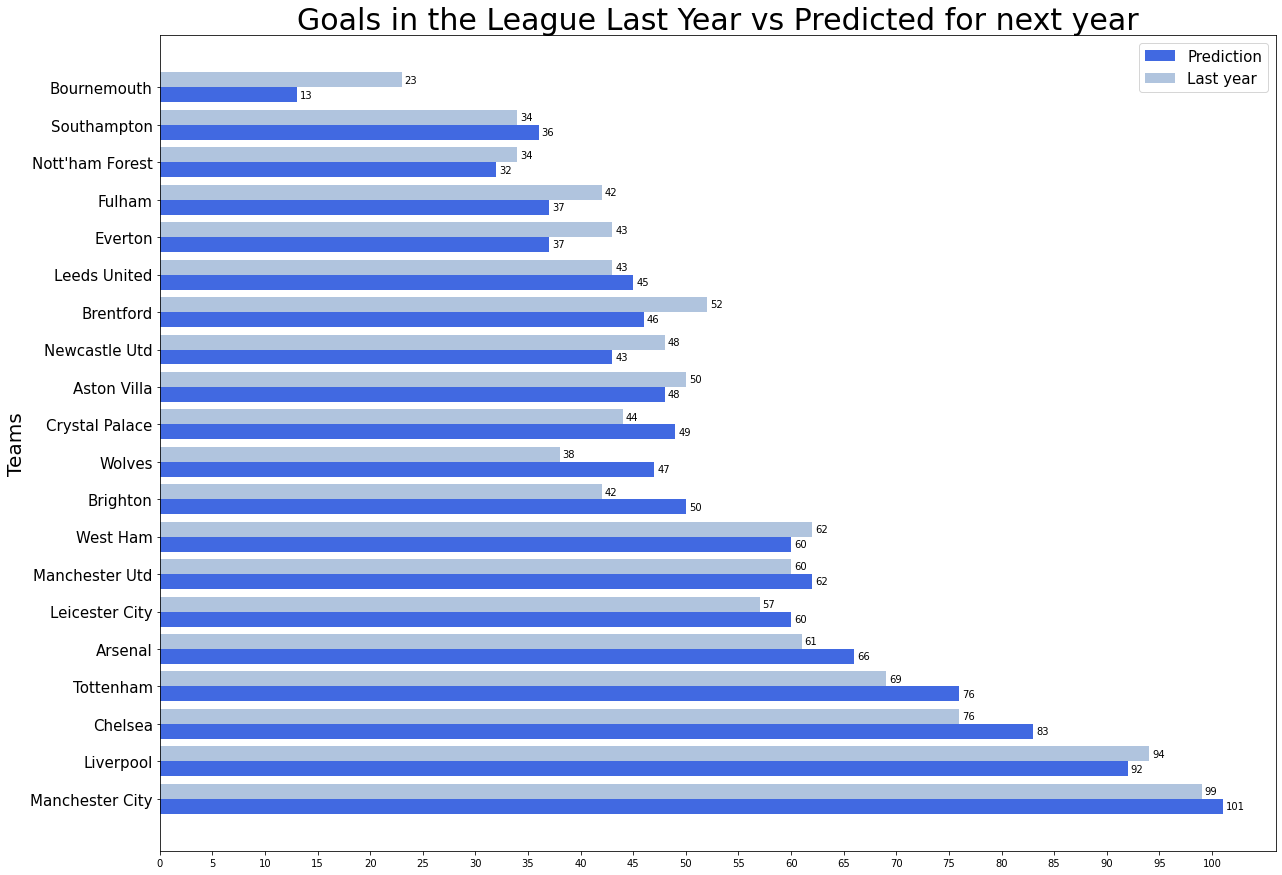

<function matplotlib.pyplot.clf()>

In [12]:
data22 = pred_table["GF"]
data21 = last_table["GF"]

x = np.arange(len(teams))
x_pos = np.arange(0, 105, 5)
width = .4

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, data22, width, label='Prediction', color='royalblue')
rects2 = ax.barh(x + width/2, data21, width, label='Last year', color='lightsteelblue')

fig.set_size_inches(20, 15)
ax.set_ylabel('Teams', fontsize=20)
ax.set_title('Goals in the League Last Year vs Predicted for next year', fontsize=30)
ax.set_yticks(x, teams, fontsize=15)
ax.set_xticks(x_pos, fontsize=15)
ax.legend(fontsize=15)

ax.bar_label(rects1, padding=3, fontsize=10)
ax.bar_label(rects2, padding=3, fontsize=10)
plt.savefig("GoalsComparison.jpg")
plt.show()
plt.clf

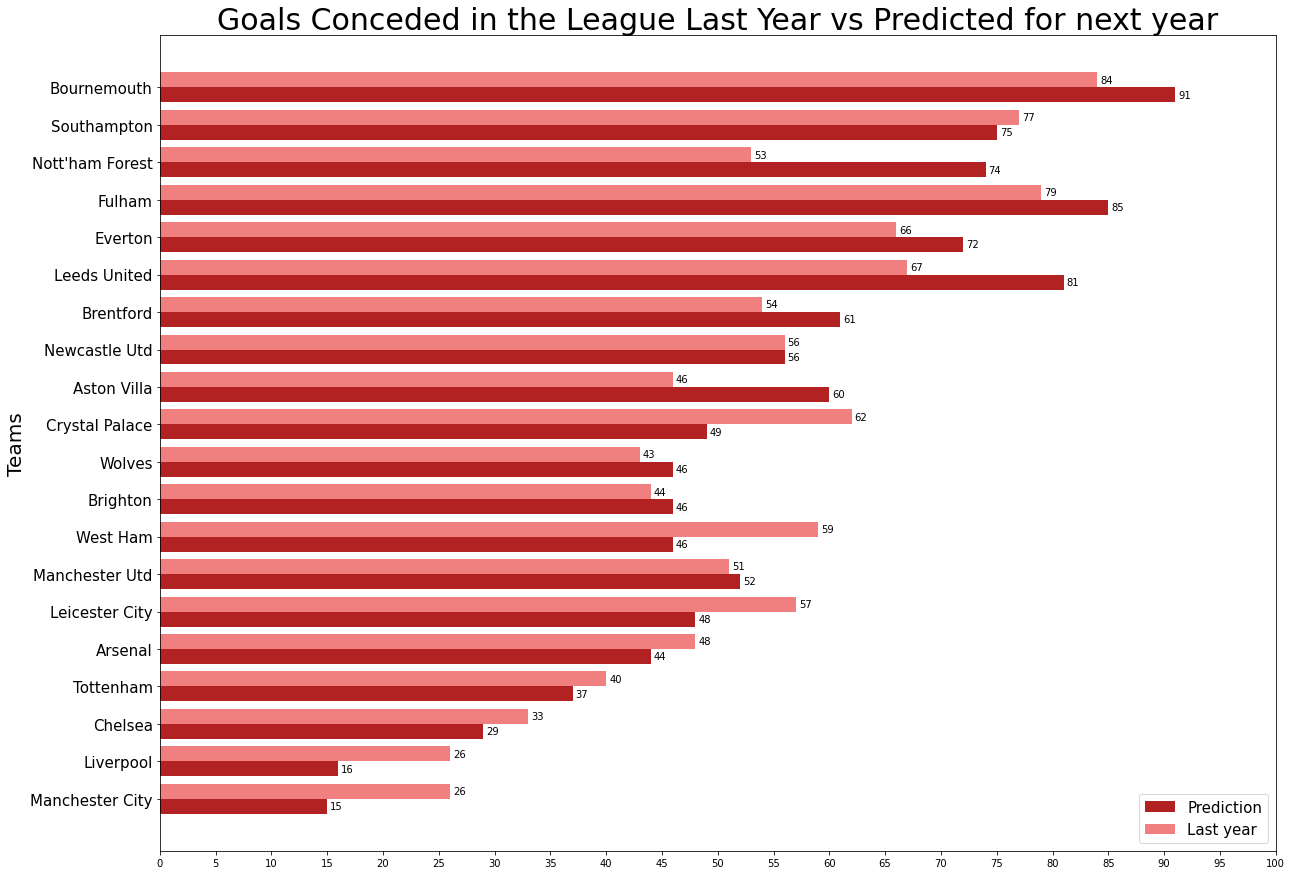

<Figure size 432x288 with 0 Axes>

In [13]:
data22 = pred_table["GA"]
data21 = last_table["GA"]

x = np.arange(len(teams))
x_pos = np.arange(0, 105, 5)
width = .4

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, data22, width, label='Prediction', color='firebrick')
rects2 = ax.barh(x + width/2, data21, width, label='Last year', color='lightcoral')

fig.set_size_inches(20, 15)
ax.set_ylabel('Teams', fontsize=20)
ax.set_title('Goals Conceded in the League Last Year vs Predicted for next year', fontsize=30)
ax.set_yticks(x, teams, fontsize=15)
ax.set_xticks(x_pos, fontsize=15)
ax.legend(fontsize=15)

ax.bar_label(rects1, padding=3, fontsize=10)
ax.bar_label(rects2, padding=3, fontsize=10)
plt.savefig("GoalsAgainstComparison.jpg")
plt.show()
plt.clf()